# SPRINT 2 ACAMICA

Parte 1

EN ESTA PRIMERA PARTE VOY A INCIAR SELECCIONANDO ALGUNAS FORMAS DE PRE PROCESAMIENTOD DE DATOS PARA IMPLEMENTARLAS EN EL DATA SET QUE SE ME BRINDO PARA LUEGO GENERAR UN MODELO COMO EL DEL SPRINT PROJECT 1 Y COMPARAR Y ANALIZAR LOS RESULTADOS

In [1]:
#Importo las librerias que voy a utilizar para trabajar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Importo el dataset proporcionado
prop=pd.read_csv("C:/Users/freib/Downloads/DS_Proyecto_01_Datos_Properati (1).csv")


In [3]:
propiedades=pd.DataFrame(prop)
#Muestro el dataset
propiedades

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta


Yo de este data set ya se por el sprint project 1 que: 
Tiene 10 tipos de propiedades diferentes
Todos los tipos de operacion son venta
Todas las propiedades estan en Buenos Aires
Los tres tipos de propiedades predominantes son deptos, casas y phs respectivamente y que el resto de las propiedades tienen bastante pocas publicaciones en relacion a esas 3 
La mayoria de las propiedades estan en Capital Federal y el resto se dividen entre Zona Sur, Norte y Oeste de manera bastante similar. (Tambien respectivamente).
Tambien se que hay bastantes outliers y algunos valores faltantes pero para saber donde y poder trabajar apartir de ello debere calcularlo.  

En un principio voy a empezar con el calculo de los outliers en cada atributo para luego quitarlos de mi data set 

In [4]:
#Empiezo con la deteccio de outliers en el atributo de rooms
valor_medio = propiedades.rooms.mean()
std = propiedades.rooms.std()
minimo_rooms = valor_medio - 3*std
maximo_rooms = valor_medio + 3*std
outliers_rooms = np.logical_or(propiedades.rooms < minimo_rooms, propiedades.rooms > maximo_rooms)
#Muestro la mascara de los valores que son outliers
propiedades[outliers_rooms]

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
456,2019-03-04,2019-06-09,2019-03-04,-34.599938,-58.492722,Argentina,Capital Federal,Villa del Parque,10.0,8.0,4.0,2000.0,1400.0,5000000.0,USD,"Venta de Casa,Villa del Parque,1400m2,",Corredor Responsable: Mónica Silvia Martinuzzi...,Casa,Venta
457,2019-03-04,2019-08-17,2019-03-04,-34.673508,-58.355954,Argentina,Bs.As. G.B.A. Zona Sur,Avellaneda,8.0,6.0,4.0,535.0,535.0,650000.0,USD,Importante casa con quincho pileta y departamento,Corredor Responsable: FRANCISCO D'ATRI - CPMCA...,Casa,Venta
506,2019-03-04,2019-06-09,2019-03-04,-34.874156,-58.072542,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,9.0,4.0,3.0,741.0,245.0,365000.0,USD,Casa cuatro dormitorios en venta City Bell,Corredor Responsable: Rico Sebastián - Martill...,Casa,Venta
511,2019-03-04,2019-03-09,2019-03-04,-34.807337,-58.454186,Argentina,Bs.As. G.B.A. Zona Sur,Esteban Echeverría,8.0,4.0,2.0,223.0,108.0,140000.0,USD,CASA Y DEPARTAMENTO EN LUIS GUILLON,Corredor Responsable: Martin Manias - CMCLZ 40...,Casa,Venta
584,2019-04-25,2019-05-10,2019-04-25,-34.589956,-58.432348,Argentina,Capital Federal,Palermo,8.0,7.0,5.0,240.0,240.0,575000.0,USD,Depto.tipo casa de 8 ambientes en Venta en Pal...,Excepcional Ph en 3 plantas ubicado en Palermo...,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146145,2019-07-31,2020-01-17,2019-07-31,-34.576458,-58.401824,Argentina,Capital Federal,Palermo,8.0,3.0,5.0,301.0,239.0,1290000.0,USD,"Excelente Departamento de 301 m² con Terraza, ...",Retasado!Excelente Departamento de 301 m² con ...,Departamento,Venta
146227,2019-07-31,2020-01-17,2019-07-31,-34.518661,-58.475149,Argentina,Bs.As. G.B.A. Zona Norte,Vicente López,8.0,4.0,6.0,434.0,309.0,2050000.0,USD,"Triplex en Venta en torre View, ubicado en Vic...","Imponente triplex a estrenar en torre View, co...",Departamento,Venta
146605,2019-07-31,2019-08-14,2019-07-31,-34.452332,-58.748984,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,9.0,6.0,3.0,350.0,350.0,680000.0,USD,POLLEDO PROPIEDADES TORTUGAS COUNTRY CLUB,Casa en venta. Gran jardín con pileta y galerí...,Casa,Venta
146606,2019-07-31,2019-08-13,2019-07-31,-34.452430,-58.745076,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,10.0,5.0,4.0,615.0,615.0,1600000.0,USD,POLLEDO PROPIEDADES Tortugas Country Club,Lindisima casa en dos plantas sobre lote de 16...,Casa,Venta


In [5]:
#Deteccion de outliers en el atributo de bedrooms
valor_medio = propiedades.bedrooms.mean()
std= propiedades.bedrooms.std()
minimo_bedrooms = valor_medio - 3*std
maximo_bedrooms = valor_medio + 3*std
outliers_bedrooms = np.logical_or(propiedades.bedrooms < minimo_bedrooms, propiedades.bedrooms > maximo_bedrooms)
#Muestro la mascara de los valores que son outliers
propiedades[outliers_bedrooms]

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
456,2019-03-04,2019-06-09,2019-03-04,-34.599938,-58.492722,Argentina,Capital Federal,Villa del Parque,10.0,8.0,4.0,2000.0,1400.0,5000000.0,USD,"Venta de Casa,Villa del Parque,1400m2,",Corredor Responsable: Mónica Silvia Martinuzzi...,Casa,Venta
457,2019-03-04,2019-08-17,2019-03-04,-34.673508,-58.355954,Argentina,Bs.As. G.B.A. Zona Sur,Avellaneda,8.0,6.0,4.0,535.0,535.0,650000.0,USD,Importante casa con quincho pileta y departamento,Corredor Responsable: FRANCISCO D'ATRI - CPMCA...,Casa,Venta
513,2019-03-04,2019-07-10,2019-03-04,-34.495416,-58.626764,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,7.0,6.0,2.0,2870.0,186.0,425000.0,USD,CASA QUINTA EN VENTA EN DON TORCUATO. IMPERDIB...,Corredor Responsable: Uno Bienes Raices SRL - ...,Casa,Venta
557,2019-07-09,2019-07-15,2019-07-09,-34.607778,-58.389769,Argentina,Capital Federal,Congreso,6.0,6.0,2.0,230.0,230.0,295000.0,USD,"PH en Venta - 230 m2. Ideal vs familias, sin exp",Corredor Responsable: JUAN FRANCISCO CARATTINO...,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145385,2020-01-15,2020-02-05,2020-01-15,-34.641533,-58.388294,Argentina,Capital Federal,Barracas,8.0,6.0,3.0,151.0,151.0,109000.0,USD,"Oportunidad 2 PH en block sin subdividir, Bar...",Corredor Responsable: GUILLERMO FRIMET - CUCIC...,PH,Venta
145387,2020-01-20,9999-12-31,2020-01-20,-34.399782,-58.767916,Argentina,Bs.As. G.B.A. Zona Norte,Escobar,9.0,6.0,7.0,8920.0,578.0,920000.0,USD,EXCLUSIVA QUINTA 2 CASAS + PILETA QUINCHO + CA...,"Propiedad situada en Ing, Maschwitz, sobre la ...",Casa,Venta
145388,2020-01-20,9999-12-31,2020-01-20,-34.694199,-58.483494,Argentina,Bs.As. G.B.A. Zona Oeste,La Matanza,7.0,7.0,2.0,148.0,210.0,239000.0,USD,Venta Casa en La Matanza G.B.A. Zona Oeste Mar...,"Casa en Venta, VENTA. Casa Multifamiliar. Muy ...",Casa,Venta
145389,2020-01-20,9999-12-31,2020-01-20,-34.399782,-58.767916,Argentina,Bs.As. G.B.A. Zona Norte,Escobar,9.0,6.0,7.0,8920.0,578.0,920000.0,USD,"INMEJORABLE LOTE 9000 m2, Sobre RUTA 26","Propiedad situada en Ing, Maschwitz, sobre la ...",Lote,Venta


In [6]:
#Deteccion de outliers en el atributo de bathrooms
valor_medio = propiedades.bathrooms.mean()
std = propiedades.bathrooms.std()
minimo_bathrooms = valor_medio - 3*std
maximo_bathrooms = valor_medio + 3*std
outliers_bathrooms = np.logical_or(propiedades.bathrooms < minimo_bathrooms, propiedades.bathrooms > maximo_bathrooms)
#Muestro la mascara de los valores que son outliers
propiedades[outliers_bathrooms]

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
310,2019-10-17,2019-12-23,2019-10-17,-34.611004,-58.361275,Argentina,Capital Federal,Puerto Madero,4.0,3.0,5.0,250.0,250.0,3390000.0,USD,Venta espectacular 4 ambientes en torre Alvear...,ALVEAR TOWER.Espectacular departamento en el e...,Departamento,Venta
325,2019-10-17,2019-12-05,2019-10-17,-34.579757,-58.408121,Argentina,Capital Federal,Palermo,5.0,4.0,5.0,266.0,266.0,2200000.0,USD,Torre Bellini - Palermo Chico - 4 amb con dep ...,Hermoso piso alto con vista abierta y terminac...,Departamento,Venta
327,2019-10-17,2019-12-05,2019-10-17,-34.579757,-58.408121,Argentina,Capital Federal,Palermo,5.0,4.0,5.0,266.0,266.0,2200000.0,USD,5 amb con dep - 2 cocheras y baulera - Torre B...,Hermoso piso alto con vista abierta y terminac...,Departamento,Venta
530,2019-03-04,2019-05-14,2019-03-04,-34.415918,-58.871507,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,5.0,3.0,5.0,860.0,690.0,1300000.0,USD,Impresionante casa de lujo amoblada exquisitam...,Corredor Responsable: MIRIAM CORRADO - CMCPDJQ...,Casa,Venta
584,2019-04-25,2019-05-10,2019-04-25,-34.589956,-58.432348,Argentina,Capital Federal,Palermo,8.0,7.0,5.0,240.0,240.0,575000.0,USD,Depto.tipo casa de 8 ambientes en Venta en Pal...,Excepcional Ph en 3 plantas ubicado en Palermo...,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146218,2019-07-31,2019-08-14,2019-07-31,-34.522112,-58.473500,Argentina,Bs.As. G.B.A. Zona Norte,Vicente López,4.0,3.0,5.0,300.0,300.0,2350000.0,USD,Vicente López - Departamento Venta,Edificio moderno con excelente acceso. Ameniti...,Departamento,Venta
146227,2019-07-31,2020-01-17,2019-07-31,-34.518661,-58.475149,Argentina,Bs.As. G.B.A. Zona Norte,Vicente López,8.0,4.0,6.0,434.0,309.0,2050000.0,USD,"Triplex en Venta en torre View, ubicado en Vic...","Imponente triplex a estrenar en torre View, co...",Departamento,Venta
146294,2019-07-31,2019-08-14,2019-07-31,-34.517551,-58.474029,Argentina,Bs.As. G.B.A. Zona Norte,Vicente López,4.0,3.0,5.0,225.0,202.0,1600000.0,USD,Horizons - 3 dormitorios con vista al Río,Excelente departamento de 3 dormitorios + depe...,Departamento,Venta
146532,2019-07-31,2019-08-14,2019-07-31,-34.582031,-58.432020,Argentina,Capital Federal,Palermo,6.0,4.0,6.0,326.0,326.0,2740000.0,USD,Torre Mirabilia Piso de 326 m2 - 4 Suites - 4 ...,"Piso Completo en las Alturas. Torre Mirabilia,...",Departamento,Venta


In [7]:
#Deteccion de outliers en el atributo de surfacetotal
valor_medio = propiedades.surface_total.mean()
std = propiedades.surface_total.std()
minimo_surface_total = valor_medio - 3*std
maximo_surface_total = valor_medio + 3*std
outliers_surface_total = np.logical_or(propiedades.surface_total < minimo_surface_total, propiedades.surface_total > maximo_surface_total)
#Muestro la mascara de los valores que son outliers
propiedades[outliers_surface_total]

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
535,2019-03-04,2019-05-23,2019-03-04,-34.316059,-58.774882,Argentina,Bs.As. G.B.A. Zona Norte,Escobar,4.0,3.0,2.0,17865.0,NaN,279000.0,USD,Casa fin de semana en Lote 17900M2 arboleda añeja,Corredor Responsable: Uno Bienes Raices SRL - ...,Lote,Venta
996,2019-04-25,2019-06-17,2019-04-25,-34.584964,-58.417603,Argentina,Capital Federal,Palermo,4.0,3.0,1.0,6845.0,5930.0,210000.0,USD,PALERMO Departamento 4 Amb. APTO PROFESIONAL,Corredor Responsable: Juan Carlos Treco - CUCI...,Departamento,Venta
1065,2019-04-25,2019-07-15,2019-04-25,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Escobar,5.0,4.0,NaN,75792.0,75792.0,580000.0,USD,Casa Puertos del Lago Muelles en construcción,Corredor Responsable: MAURO MARVISI - CSI 5574...,Casa,Venta
1116,2019-04-25,2019-11-21,2019-04-25,-34.391177,-58.870490,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,7.0,6.0,NaN,11000.0,350.0,450000.0,USD,Impactante casa quinta inmersa en PILAR,Corredor Responsable: Luis Varela - CSI 5527 /...,Casa,Venta
1117,2019-04-25,2019-06-09,2019-04-25,-34.391177,-58.870490,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,7.0,6.0,NaN,11000.0,350.0,450000.0,USD,Gran casa quinta inmersa en PILAR DEL ESTE,Corredor Responsable: Luis Varela - CSI 5527 /...,Casa,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133101,2019-02-13,2019-07-10,2019-02-13,-34.999815,-58.713674,Argentina,Bs.As. G.B.A. Zona Sur,Cañuelas,8.0,4.0,6.0,25847.0,998.0,3000000.0,USD,Casa de Campo con cabañas en Cañuelas,Corredor Responsable: Martin Manias - CMCLZ 40...,Casa,Venta
145309,2020-01-15,2020-01-21,2020-01-15,-34.658875,-58.469866,Argentina,Capital Federal,Villa Lugano,4.0,3.0,1.0,7274.0,7274.0,89000.0,USD,VENTA 4 AMB 73m2 LUMINOSO LUGANO B°NAGERA,Corredor Responsable: Martin Macagno - CUCICBA...,Departamento,Venta
145327,2020-01-15,9999-12-31,2020-01-15,-34.630333,-58.662356,Argentina,Bs.As. G.B.A. Zona Oeste,Ituzaingó,4.0,3.0,2.0,7600.0,NaN,1000000.0,USD,Venta terreno 7600 ideal inversor villa Udaondo .,Corredor Responsable: Nuria Parello - CMCPDJM ...,Lote,Venta
145387,2020-01-20,9999-12-31,2020-01-20,-34.399782,-58.767916,Argentina,Bs.As. G.B.A. Zona Norte,Escobar,9.0,6.0,7.0,8920.0,578.0,920000.0,USD,EXCLUSIVA QUINTA 2 CASAS + PILETA QUINCHO + CA...,"Propiedad situada en Ing, Maschwitz, sobre la ...",Casa,Venta


In [8]:
#Deteccion de outliers en el atributo de surface_covered
valor_medio = propiedades.surface_covered.mean()
std = propiedades.surface_covered.std()
minimo_surface_covered = valor_medio - 3*std
maximo_surface_covered = valor_medio + 3*std
outliers_surface_covered = np.logical_or(propiedades.surface_covered < minimo_surface_covered, propiedades.surface_covered > maximo_surface_covered)
#Muestro la mascara de los valores que son outliers
propiedades[outliers_surface_covered]

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
476,2019-03-04,2019-08-17,2019-03-04,-34.779414,-58.391520,Argentina,Bs.As. G.B.A. Zona Sur,Lomas de Zamora,4.0,2.0,1.0,148.0,11098.0,129000.0,USD,Casa a refaccionar en bonita zona Temperley,Corredor Responsable: FRANCISCO D'ATRI - CPMCA...,Casa,Venta
583,2019-08-16,2019-09-04,2019-08-16,-34.604202,-58.426116,Argentina,Capital Federal,Caballito,2.0,1.0,1.0,5119.0,4685.0,133094.0,USD,Departamento 2 Ambientes Amplio - Almagro Norte,HACE UNA OFERTA YA MISMO! - HASTA 20 CUOTAS FI...,Departamento,Venta
996,2019-04-25,2019-06-17,2019-04-25,-34.584964,-58.417603,Argentina,Capital Federal,Palermo,4.0,3.0,1.0,6845.0,5930.0,210000.0,USD,PALERMO Departamento 4 Amb. APTO PROFESIONAL,Corredor Responsable: Juan Carlos Treco - CUCI...,Departamento,Venta
1065,2019-04-25,2019-07-15,2019-04-25,NaN,NaN,Argentina,Bs.As. G.B.A. Zona Norte,Escobar,5.0,4.0,NaN,75792.0,75792.0,580000.0,USD,Casa Puertos del Lago Muelles en construcción,Corredor Responsable: MAURO MARVISI - CSI 5574...,Casa,Venta
1234,2019-12-30,9999-12-31,2019-12-30,-34.920129,-57.941689,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,3.0,2.0,1.0,9758.0,8078.0,169700.0,USD,"51 entre 3 y 4. Depto de pozo, 2 dormitorios e...",El emprendimiento se encuentra ubicado en el e...,Departamento,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131157,2019-10-08,2020-01-21,2019-10-08,-34.553438,-58.452211,Argentina,Capital Federal,Belgrano,3.0,2.0,2.0,8352.0,6137.0,342000.0,USD,"Venta Departamento 3 ambientes, Balcón parrilla",Corredor Responsable: Gustavo Guastello - C.U....,Departamento,Venta
131712,2019-10-08,2019-10-18,2019-10-08,-34.563374,-58.438485,Argentina,Capital Federal,Palermo,4.0,3.0,2.0,132.0,13235.0,605000.0,USD,Vta Semipiso de 3 Dor-Escrit+d.serv c/cohera,Corredor Responsable: Pamela Suarez - CUCICBA ...,Departamento,Venta
131723,2019-10-08,2019-11-12,2019-10-08,-34.583663,-58.446227,Argentina,Capital Federal,Palermo,4.0,3.0,2.0,10240.0,9256.0,199000.0,USD,VENTA DEPTO. 4 AMB. 3 DORM. PALERMO HOLLYWOOD ...,Corredor Responsable: Mariano Menendez - CUCIC...,Departamento,Venta
132143,2019-10-08,2020-01-13,2019-10-08,-34.441020,-58.648893,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,7.0,3.0,5.0,768.0,36462.0,780000.0,USD,Casa en Venta Talar del Lago 1,Corredor Responsable: Matias Castelli - CUCICB...,Casa,Venta


In [9]:
#Deteccion de outliers en el atributo de price
valor_medio = propiedades.price.mean()
std = propiedades.price.std()
minimo_price = valor_medio - 3*std
maximo_price = valor_medio + 3*std
outliers_price = np.logical_or(propiedades.price < minimo_price, propiedades.price > maximo_price)
#Muestro la mascara de los valores que son outliers
propiedades[outliers_price]

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
231,2019-10-17,2019-12-23,2019-10-17,-34.611004,-58.361275,Argentina,Capital Federal,Puerto Madero,3.0,2.0,4.0,149.0,149.0,1690000.0,USD,"Venta Alvear Tower 2 suites, 2 cocheras !!",ALVEAR TOWER.Espectacular departamento en el e...,Departamento,Venta
255,2019-10-17,9999-12-31,2019-10-17,-34.598231,-58.569898,Argentina,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,4.0,3.0,3.0,341.0,212.0,11111111.0,USD,VENTA CASA EN CASEROS,Venta casa en Caseros desarrollada en 2 planta...,Casa,Venta
274,2019-10-17,2019-11-12,2019-10-17,-34.572445,-58.420624,Argentina,Capital Federal,Palermo,6.0,3.0,2.0,304.0,304.0,1480000.0,USD,VENTA PALERMO,"Superficie: 304,30m2Características:FrenteMuy ...",Departamento,Venta
280,2019-10-17,2019-11-19,2019-10-17,-34.576297,-58.419997,Argentina,Capital Federal,Palermo,6.0,3.0,3.0,276.0,276.0,1680000.0,USD,Piso ALTO en DUPLEX U$1.680.000 vista a Monu...,Piso de gran categoríaRegia vista a parquesRec...,Departamento,Venta
310,2019-10-17,2019-12-23,2019-10-17,-34.611004,-58.361275,Argentina,Capital Federal,Puerto Madero,4.0,3.0,5.0,250.0,250.0,3390000.0,USD,Venta espectacular 4 ambientes en torre Alvear...,ALVEAR TOWER.Espectacular departamento en el e...,Departamento,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146532,2019-07-31,2019-08-14,2019-07-31,-34.582031,-58.432020,Argentina,Capital Federal,Palermo,6.0,4.0,6.0,326.0,326.0,2740000.0,USD,Torre Mirabilia Piso de 326 m2 - 4 Suites - 4 ...,"Piso Completo en las Alturas. Torre Mirabilia,...",Departamento,Venta
146558,2019-07-31,2020-01-17,2019-07-31,NaN,NaN,Argentina,Capital Federal,Palermo,4.0,3.0,5.0,220.0,210.0,1470000.0,USD,TORRE DECO SEGUI ESPECTACULAR UNIDAD DE 4 AMB ...,EXCLUSIVO Torre Deco Seguí Oportunidad de Inve...,Departamento,Venta
146606,2019-07-31,2019-08-13,2019-07-31,-34.452430,-58.745076,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,10.0,5.0,4.0,615.0,615.0,1600000.0,USD,POLLEDO PROPIEDADES Tortugas Country Club,Lindisima casa en dos plantas sobre lote de 16...,Casa,Venta
146607,2019-07-31,2019-08-14,2019-07-31,-34.453846,-58.750312,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,11.0,4.0,4.0,450.0,450.0,1280000.0,USD,Tortugas Country Club,Espectacular casa en dos plantas. Sobre lote d...,Casa,Venta


In [10]:
print(minimo_price)
print(minimo_bedrooms)
print(minimo_bathrooms)
print(minimo_rooms)
print(minimo_surface_covered)
print(minimo_surface_total)

-714337.3039107145
-1.4706733427599663
-1.0679784697287216
-1.1692382586140875
-2637.7547401627726
-5895.947058728795


In [11]:
print(maximo_price)
print(maximo_bedrooms)
print(maximo_bathrooms)
print(maximo_rooms)
print(maximo_surface_covered)
print(maximo_surface_total)

1196779.4643089143
5.43715363731881
4.267967098258319
7.328872787456308
2863.3907621066974
6329.692835012559


In [12]:
#Pongo valores reales y logicos a las variables de minimos y maximos
minimo_rooms=1
minimo_bedrooms=1
minimo_bathrooms=1
minimo_surface_covered=15
minimo_surface_total=20
minimo_price=15000
maximo_surface_total=750
maximo_surface_covered=700

Como se puede observar en los datos de arriba, los valores minimos que esta tomando el programa para calcular mis outliers no tienen sentido por lo que debere filtrar mis datos con los valores logicos que elegi en la linea de codigo anterior

In [13]:
propiedades1=propiedades[(propiedades["rooms"] <= maximo_rooms) &  (propiedades["rooms"] >= minimo_rooms)]
propiedades2=propiedades1[(propiedades1["bedrooms"] <= maximo_bedrooms) &  (propiedades1["bedrooms"] >= minimo_bedrooms)]
propiedades3=propiedades2[(propiedades2["bathrooms"] <= maximo_bathrooms) &  (propiedades2["bathrooms"] >= minimo_bathrooms)]
propiedades4=propiedades3[(propiedades3["surface_covered"] <= maximo_surface_covered) &  (propiedades3["surface_covered"] >= minimo_surface_covered)]
propiedades5=propiedades4[(propiedades4["surface_total"] <= maximo_surface_covered) &  (propiedades4["surface_total"] >= minimo_surface_covered)]
propiedades6=propiedades5[(propiedades5["price"] <= maximo_price) &  (propiedades5["price"] >= minimo_price)]
propiedades7=propiedades6[(propiedades6['surface_total'] >=propiedades6["surface_covered"])]
propiedades7

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta


Este es el dataset que termian quedando luego de filtrar los outliers con las condiciones dispuestas. Ahora voy a sacar las columnas que creo poco necesarias y que hacen mi datset mucho mas pesado. Tambien voy a borrar las propiedades que no sean de capital federal y no sean departamentos, ph o casa. Esto es para qeu el dataset tenga las mismas condiciones que el del sprint project 1 y compararlo de forma logica.

In [14]:
propiedades8=propiedades7.drop(columns=["start_date","end_date","created_on","lat","lon","l1","description","currency","title","operation_type"])
propiedades9= propiedades8[propiedades8.property_type.isin(["Departamento","PH","Casa"]) & propiedades8.l2.isin(["Capital Federal"])]
propiedades10=propiedades9.drop(columns=["l2"])
propiedades10

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH
6,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,PH
...,...,...,...,...,...,...,...,...
146553,Palermo,4.0,3.0,2.0,106.0,100.0,620000.0,Departamento
146554,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,PH


Ya teniendo filtrados los outliers, mi siguiente paso sera buscar los Nans, tratar de entender de que tipo son y luego ver de que manera trabajar con ellos.


In [15]:
#Valores faltantes luego del filtrado
propiedades10.isna().sum()

l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

In [16]:
#Valores faltantes al iniciar 
propiedades.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

Por lo que se puede ver el dataset original venia con valores faltantes que a medida que fui filtrando los outliers de cada atributo, esas instancias fueron elimnandose.

Por el momento en mi dataset hay dos atributos que no son numericos, qeu son el tipo de propiedad y la zona donde se ubican. Para cambiar esto voy a proceder a encodearlos para poder tener todo mi dataset numerico

In [17]:
dummies = pd.get_dummies(propiedades10[["l3","property_type"]])
dummies

,l3_Abasto,l3_Agronomía,l3_Almagro,l3_Balvanera,l3_Barracas,l3_Barrio Norte,l3_Belgrano,l3_Boca,l3_Boedo,l3_Caballito,...,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque,property_type_Casa,property_type_Departamento,property_type_PH
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146553,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
146554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
146555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
146556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
#Junto los datos de las features binarizadas con el dataset original
dataprop=pd.concat([propiedades10,dummies],axis=1)
dataprop

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,l3_Abasto,l3_Agronomía,...,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque,property_type_Casa,property_type_Departamento,property_type_PH
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,0,0,...,0,0,0,0,0,0,0,0,0,1
5,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH,0,0,...,0,0,0,0,0,0,0,0,0,1
6,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,PH,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146553,Palermo,4.0,3.0,2.0,106.0,100.0,620000.0,Departamento,0,0,...,0,0,0,0,0,0,0,0,1,0
146554,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,PH,0,0,...,0,0,0,0,0,0,0,0,0,1
146555,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,PH,0,0,...,0,0,0,0,0,0,0,0,0,1
146556,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,PH,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
#Elimino las features que binarice en su forma no numerica
dataprop=dataprop.drop(columns=["l3","property_type"])
dataprop

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,l3_Abasto,l3_Agronomía,l3_Almagro,l3_Balvanera,...,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque,property_type_Casa,property_type_Departamento,property_type_PH
1,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2.0,1.0,1.0,45.0,45.0,125000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2.0,1.0,1.0,85.0,50.0,295000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,2.0,1.0,1.0,56.0,56.0,150000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,2.0,1.0,1.0,70.0,70.0,159500.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146553,4.0,3.0,2.0,106.0,100.0,620000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
146554,4.0,3.0,3.0,175.0,111.0,570000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
146555,3.0,2.0,2.0,144.0,134.0,480000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
146556,4.0,2.0,2.0,317.0,143.0,530000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Despues de haber hecho el encond de mis datos me doy cuenta que el dataset crecio considerablemente, por lo que puedo suponer que va a ser bastante complicado de manipular.  

Ya hecho el encoding y teniendo todas mis variables en forma numerica, veo que el dataset aumento considerablemente su tamaño por lo que decido aplicar un PCA para realizar una reduccion de dimensionalidad y ver si puedo mejorar resultados

In [20]:
#Importo las librerias necesarias y determino mis ejes para luego poder hacer un arbol de decision y una reduccion de dimensionalidad 
from sklearn.decomposition import PCA
X=dataprop.drop(columns=["price"])
y=dataprop["price"]
pca = PCA(n_components=10)
X_nuevo = pca.fit_transform(X) 

In [21]:
pca.components_

array([[ 1.10499254e-02,  8.79462009e-03,  5.93286973e-03,
         7.96484958e-01,  6.04461183e-01, -1.18028113e-05,
        -1.21250404e-06, -1.49600065e-04, -5.52539009e-05,
         2.78636136e-05,  3.65976831e-05,  1.60103711e-04,
        -5.31803524e-06, -8.10797122e-06, -2.34152949e-05,
         1.24684889e-08, -2.52027062e-05, -1.91307967e-05,
        -6.19750918e-06, -2.09272493e-05, -2.56012926e-05,
        -2.18177184e-05,  3.30682481e-05,  1.98592016e-05,
         3.25396658e-05, -1.32005358e-06,  2.80197238e-05,
        -2.31697820e-05, -1.03065742e-05, -1.08991629e-05,
        -1.51042272e-05, -5.57145751e-05,  1.03248481e-05,
        -6.98362317e-06,  1.42528544e-05, -2.18622939e-06,
         1.09907423e-05,  1.70519550e-06,  2.26760481e-05,
         9.79873513e-05,  3.40319518e-04,  3.23235469e-05,
        -1.46357684e-05, -3.02849095e-05, -4.50128822e-05,
        -3.51916879e-05, -5.98342995e-06,  3.19649879e-06,
         1.92497470e-05, -2.92516324e-04,  8.15400832e-0

In [22]:
pca.singular_values_

array([21212.38203737,  4207.33134637,   255.76929448,   152.37268211,
         117.56452901,   101.87167975,    80.4102678 ,    75.30790686,
          74.13143049,    73.69528353])

In [23]:
pca.explained_variance_

array([5.82962133e+03, 2.29337407e+02, 8.47536237e-01, 3.00798516e-01,
       1.79066391e-01, 1.34452351e-01, 8.37692220e-02, 7.34755116e-02,
       7.11977429e-02, 7.03624338e-02])

In [24]:
pca.explained_variance_ratio_

array([9.61775158e-01, 3.78362518e-02, 1.39827144e-04, 4.96259575e-05,
       2.95425032e-05, 2.21820464e-05, 1.38203071e-05, 1.21220432e-05,
       1.17462553e-05, 1.16084454e-05])

In [25]:
pca.mean_

array([2.91849664e+00, 1.93685465e+00, 1.48326791e+00, 8.82075609e+01,
       7.59153096e+01, 5.19517535e-03, 1.93037688e-03, 8.71649371e-02,
       2.99402749e-02, 8.22677394e-03, 3.85816264e-02, 7.19032998e-02,
       3.34253177e-03, 9.54823999e-03, 7.20717219e-02, 6.47777475e-05,
       5.86886393e-03, 8.18790729e-03, 6.43890811e-03, 1.62592146e-02,
       7.21624108e-03, 4.68990892e-03, 2.66236542e-02, 1.01053286e-02,
       8.25268504e-03, 7.11259668e-03, 6.43890811e-03, 9.00410691e-03,
       6.77575239e-03, 2.25815228e-02, 8.90046251e-03, 1.49403397e-01,
       2.56519880e-03, 1.64276368e-02, 8.77090702e-03, 3.16115408e-03,
       5.22108645e-03, 1.19320611e-02, 2.37086556e-03, 1.57021260e-02,
       6.59307915e-02, 9.26321790e-03, 1.18802389e-02, 1.17895501e-02,
       8.42110718e-03, 1.15304391e-02, 2.00811017e-03, 1.58057704e-03,
       2.52633215e-03, 7.55826758e-02, 1.54559706e-02, 4.14577584e-03,
       5.54497519e-03, 5.85590838e-03, 3.13524298e-03, 8.36928498e-03,
      

Text(0, 0.5, 'X_nuevo[:,1]')

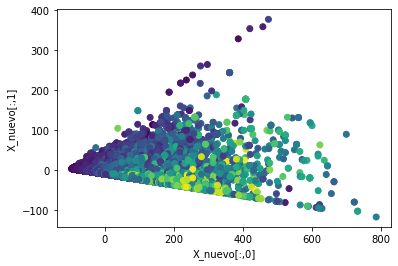

In [26]:
plt.scatter(X_nuevo[:,0], X_nuevo[:,1], c = y)
plt.xlabel('X_nuevo[:,0]')
plt.ylabel('X_nuevo[:,1]')

Text(0, 0.5, 'y')

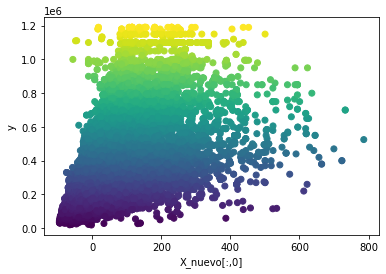

In [27]:
plt.scatter(X_nuevo[:,0], y, c=y)
plt.xlabel('X_nuevo[:,0]')
plt.ylabel('y')

Text(0, 0.5, 'y')

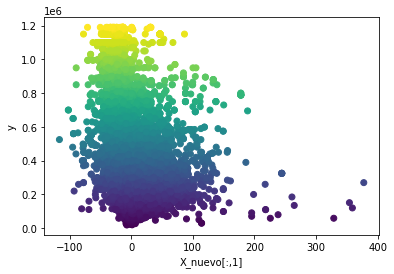

In [28]:
plt.scatter(X_nuevo[:,1], y, c=y)
plt.xlabel('X_nuevo[:,1]')
plt.ylabel('y')

In [29]:
#Importo las librerias necesarias para realizar un arbol de decision. Primero lo hago sin la reduccion de dimensionalidad hecha
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
#Utilizo los mismos parametros que utlice en el Sprint Project anterior
regresor = DecisionTreeRegressor(max_depth=5, random_state = 42)
regresor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [32]:
y_train_pred = regresor.predict(X_train)
y_test_pred = regresor.predict(X_test)

In [33]:
#Veo los resultados tanto para train como para test de este primer arbol
from sklearn.metrics import mean_squared_error

print(np.sqrt(mean_squared_error(y_train,y_train_pred)))
print(np.sqrt(mean_squared_error(y_test,y_test_pred)))


84864.60514660394
85517.43058133009


In [34]:
#Hago el abol de nuevo pero esta vez con los datos con la reduccion de dimensionalidad hecha
X_train_nuevo, X_test_nuevo, y_train_nuevo, y_test_nuevo = train_test_split(X_nuevo, y, test_size=0.33, random_state=42)

In [35]:
#Utilizo los mismos parametros que utlice en el Sprint Project anterior
regresor2 = DecisionTreeRegressor(max_depth=5, random_state = 42)
regresor2.fit(X_train_nuevo,y_train_nuevo)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [36]:
y_train_pred_nuevo = regresor2.predict(X_train_nuevo)
y_test_pred_nuevo = regresor2.predict(X_test_nuevo)

In [37]:
#Veo los resultados tanto para train como para test de este otro arbol
print(np.sqrt(mean_squared_error(y_train_nuevo,y_train_pred_nuevo)))
print(np.sqrt(mean_squared_error(y_test_nuevo,y_test_pred_nuevo)))

92071.25615942788
92478.54464471161


Luego de haber realizado estos dos arboles puedo darme cuenta que la reduccion de dimensionlidad no tuvo los resultados que yo deseaba ya que el modelo que trabaj con los datos que no la tienen aplicada, funciona mejor que el que trabaja con los datos que si. 

Comparando los resultados entre estos arboles y el del Sprint Project 1 puedo ver que estos son bastante mejores que ese. Creo que esto se debe al pre procesamiento que aplique a los datos para un caso y para otro. El parametro para la deteccion de outliers fue otro, hay atributos en este Sprint que en el anterior no estuvieron por no ser numericos pero en este caso los pude encodear. Tambien podria nombrar la reduccion de dimensionalidad pero los resultados que obtuve en relacion al otro arbol de este spint no fueron los deseados. Creo que la manera de imputar los valores faltantes tambien tiene que ver porque, por mas que no haya imputado ninguno en este Sprint porque se filtraron, en el pasado los dropee sin ningun tipo de analisis y eso pudo haber afectado.

# SEGUNDA PARTE MODELOS AVANZADOS

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
#Hago un random forest para el dataset sin el PCA hecho
clf = RandomForestRegressor(n_estimators=100, max_features="sqrt", n_jobs=-1, oob_score = True, random_state = 42)
clf.fit(X_train,y_train)

RandomForestRegressor(max_features='sqrt', n_jobs=-1, oob_score=True,
                      random_state=42)

In [42]:
import sklearn.metrics as metrics
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(np.sqrt(mean_squared_error(y_train, y_train_pred)))
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

24574.930481771342
50943.16765123577


In [43]:
clf.oob_score

True

In [44]:
#Hago un random forest para el dataset con el PCA hecho
clf2 = RandomForestRegressor(n_estimators=100, max_features="sqrt", n_jobs=-1, oob_score = True, random_state = 42)
clf2.fit(X_train_nuevo,y_train_nuevo)

RandomForestRegressor(max_features='sqrt', n_jobs=-1, oob_score=True,
                      random_state=42)

In [45]:
y_train_pred_nuevo = clf2.predict(X_train_nuevo)
y_test_pred_nuevo = clf2.predict(X_test_nuevo)
print(np.sqrt(mean_squared_error(y_train_nuevo, y_train_pred_nuevo)))
print(np.sqrt(mean_squared_error(y_test_nuevo, y_test_pred_nuevo)))

25714.45480415401
54811.02402882667


Veo que sigue siendo mejor el modelo con el dataset que no tiene hecho el PCA, asi que voy a proceder a optimizar los hiperparametros de ese modelo

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import scipy as sp

Busco dentro de determinados optimizar mis parametros atraves de grid search

In [45]:
# Grilla para Random Search del Arbol de decision
param_grid_clf = {
              'max_depth': np.arange(1, 10),               'min_samples_split':[2,3,4],              'min_samples_leaf':[1,3,5]}#,               'min_samples_split':[2,3,4],              'min_samples_leaf':[1,3,5]

In [46]:
modelo_RF=RandomForestRegressor()
model_clf = GridSearchCV(modelo_RF, param_grid=param_grid_clf, cv=5)

In [47]:
model_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 3, 4]})

In [48]:
print("Mejores parametros RandomForest: "+str(model_clf.best_params_))
print("Mejor Score RandomForest: "+str(model_clf.best_score_)+'\n')
print('Mejor modelo: ',model_clf.best_estimator_)
scores_randomForest = pd.DataFrame(model_clf.cv_results_)
scores_randomForest

Mejores parametros RandomForest: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 3}
Mejor Score RandomForest: 0.8299394743418274

Mejor modelo:  RandomForestRegressor(max_depth=9, min_samples_split=3)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.121469,0.066816,0.033391,0.004292,1,1,2,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.451330,0.443329,0.442840,0.447191,0.442930,0.445524,0.003324,76
1,2.139586,0.040164,0.046676,0.000396,1,1,3,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.453322,0.444407,0.439955,0.447418,0.440807,0.445182,0.004865,78
2,2.111597,0.021550,0.037497,0.007655,1,1,4,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.450931,0.444315,0.441782,0.447507,0.444107,0.445728,0.003176,75
3,2.218347,0.075281,0.040620,0.007655,1,3,2,"{'max_depth': 1, 'min_samples_leaf': 3, 'min_s...",0.450879,0.442894,0.439427,0.447142,0.443924,0.444853,0.003891,81
4,2.186771,0.060469,0.042965,0.006052,1,3,3,"{'max_depth': 1, 'min_samples_leaf': 3, 'min_s...",0.450641,0.444111,0.440768,0.448427,0.442874,0.445364,0.003637,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,18.928650,0.081412,0.109450,0.009752,9,3,3,"{'max_depth': 9, 'min_samples_leaf': 3, 'min_s...",0.828470,0.840350,0.831662,0.819692,0.823510,0.828737,0.007108,6
77,18.972280,0.087288,0.103118,0.007054,9,3,4,"{'max_depth': 9, 'min_samples_leaf': 3, 'min_s...",0.829364,0.841225,0.832612,0.819529,0.822946,0.829135,0.007601,4
78,18.918779,0.145824,0.109023,0.003993,9,5,2,"{'max_depth': 9, 'min_samples_leaf': 5, 'min_s...",0.827852,0.839359,0.830767,0.818905,0.821875,0.827752,0.007164,7
79,18.902947,0.081708,0.113016,0.007291,9,5,3,"{'max_depth': 9, 'min_samples_leaf': 5, 'min_s...",0.826761,0.838433,0.830069,0.818995,0.821752,0.827202,0.006806,9


Encuentro que dentro de los prametros que ingrese en el grid search, el mejor es con una profundidad de 9. Puedo deducir que si sigo aumentando la profundiad, el modelo va a ser mejor todavia

In [47]:
clf_semioptimo = RandomForestRegressor(n_estimators=100, max_features="sqrt", n_jobs=-1, oob_score = True, random_state = 42,max_depth=9)
clf_semioptimo.fit(X_train,y_train)

RandomForestRegressor(max_depth=9, max_features='sqrt', n_jobs=-1,
                      oob_score=True, random_state=42)

In [48]:
y_train_pred = clf_semioptimo.predict(X_train)
y_test_pred = clf_semioptimo.predict(X_test)
print(np.sqrt(mean_squared_error(y_train, y_train_pred)))
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

73698.9378381264
75681.11096214957


Busco optimizar mis parametros atraves de cross validation y lo grafico, en esta oprtunidad voy a dejar que se analice a mas profundidades que con grid search por la sospecha que tengo

In [46]:
from sklearn.model_selection import cross_validate
import sklearn
sorted(sklearn.metrics.SCORERS.keys())
scores_train = []
scores_test = []
profundidades = np.arange(1,50)
for max_depth in profundidades:
    clf = RandomForestRegressor(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    scores_train.append(mean_squared_error(y_train, y_pred_train))
    scores_test.append(mean_squared_error(y_test, y_pred_test))

scores_train = np.array(scores_train)
scores_test = np.array(scores_test)

KeyboardInterrupt: 

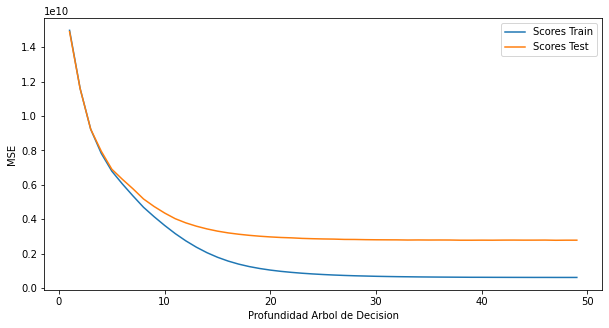

In [52]:
plt.figure(figsize=(10,5))
plt.plot(profundidades,scores_train, label = 'Scores Train')
plt.plot(profundidades,scores_test, label = 'Scores Test')
plt.legend()
plt.ylabel('MSE')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

In [53]:
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,50,1)

for profundidad in profundidades:
    clf = RandomForestRegressor(max_depth=profundidad)
    tree_scores = cross_validate(clf, X, y, cv=5, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

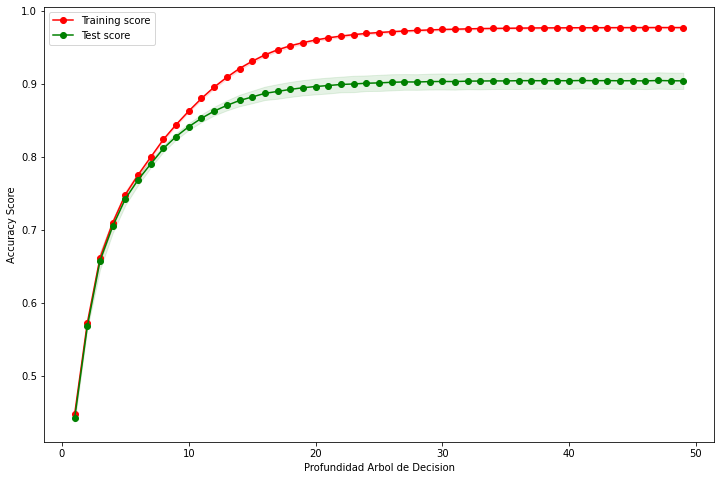

In [54]:
plt.figure(figsize=(12,8))
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")
plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")
plt.legend()
plt.ylabel('Accuracy Score')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

In [49]:
clf_optimo = RandomForestRegressor(n_estimators=100, max_features="sqrt", n_jobs=-1, oob_score = True, random_state = 42,max_depth=20)
clf_optimo.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_jobs=-1,
                      oob_score=True, random_state=42)

In [50]:
y_train_pred = clf_optimo.predict(X_train)
y_test_pred = clf_optimo.predict(X_test)
print(np.sqrt(mean_squared_error(y_train, y_train_pred)))
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

41782.24054292227
55648.828003993636


Confirmando mis sospechas, puedo ver que la mejor profundidad para mi arbol se encuentra aproximadamente en 20 y resulta una RMSE de 55648, lo cual es bastante beuno comparado con modelos anteriores. Podria mejorar el rendimiento de mi modelo en una profundidad 30 por ejemplo pero seria a costa de una mayor diferencia entre el train y el test asi que por la diferencia que hay priorizo que mi modelo generalice mejor. Dejo abajo los resultados con max depth 30.

In [51]:
clf_optimo30 = RandomForestRegressor(n_estimators=100, max_features="sqrt", n_jobs=-1, oob_score = True, random_state = 42,max_depth=30)
clf_optimo30.fit(X_train,y_train)

RandomForestRegressor(max_depth=30, max_features='sqrt', n_jobs=-1,
                      oob_score=True, random_state=42)

In [52]:
y_train_pred = clf_optimo30.predict(X_train)
y_test_pred = clf_optimo30.predict(X_test)
print(np.sqrt(mean_squared_error(y_train, y_train_pred)))
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

28809.623856700946
51644.02299888786


Puedo confirmar que el modelo de profundidad 30 es un poquito mejor pero se overfitea bastante, lo cual significa que generaliza peor. Yo personalmente priorizo que generalice mejor y es por eso que el de 20 me parece mas efectivo

In [53]:
# Segundo modelo elegido con linearRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures()

X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

regr=LinearRegression()
regr.fit(X_train_poly,y_train) # Le paso el X_train_poly y X_test_poly del poly

y_train_pred_poly=regr.predict(X_train_poly)
y_test_pred_poly=regr.predict(X_test_poly)

print(np.sqrt(mean_squared_error(y_train,y_train_pred_poly)))
print(np.sqrt(mean_squared_error(y_test,y_test_pred_poly)))

65274.91860800373
1364334418.861778


In [54]:
#  Regularizacion con Ridge
from sklearn.linear_model import Ridge

clf_poly=Ridge()
clf_poly.fit(X_train_poly,y_train) # Entreno el modelo con los mismos datos que el modelo de poly

y_train_pred_clf_poly=clf_poly.predict(X_train_poly)
y_test_pred_clf_poly=clf_poly.predict(X_test_poly)

print(np.sqrt(mean_squared_error(y_train,y_train_pred_clf_poly)))
print(np.sqrt(mean_squared_error(y_test,y_test_pred_clf_poly)))

65278.319691092875
66699.23965128606


In [59]:
modelo_regr=Ridge()

param_grid_poly = {'alpha': [1, 0.5, 0.1 ,0.01, 0.005, 0.001],
              'fit_intercept': [True,False],
              'solver':['svd','sag','saga','cholesky']}  

In [60]:
regr_optimizado = RandomizedSearchCV(modelo_regr, param_grid_poly,n_iter=4,random_state=42, cv=5)


In [61]:
regr_optimizado.fit(X_train_poly,y_train)

print("Mejores parametros POLY: "+str(regr_optimizado.best_params_))
print("Mejor Score POLY: "+str(regr_optimizado.best_score_)+'\n')
print('Mejor modelo: ',regr_optimizado.best_estimator_)
scores_poly = pd.DataFrame(regr_optimizado.cv_results_)
scores_poly

C:\Users\freib\OneDrive\Documentos\CURSO DATA SCIENCE 2021\envs\datascience\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.16316e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\freib\OneDrive\Documentos\CURSO DATA SCIENCE 2021\envs\datascience\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.14683e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\freib\OneDrive\Documentos\CURSO DATA SCIENCE 2021\envs\datascience\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.17724e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\freib\OneDrive\Documentos\CURSO DATA SCIENCE 2021\envs\datascience\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.20214e-17): result may not be accurate.
  r

Mejores parametros POLY: {'solver': 'cholesky', 'fit_intercept': True, 'alpha': 0.01}
Mejor Score POLY: 0.8363652821490651

Mejor modelo:  Ridge(alpha=0.01, solver='cholesky')


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,param_fit_intercept,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,18.006454,1.812581,0.464449,0.157490,cholesky,True,0.01,"{'solver': 'cholesky', 'fit_intercept': True, ...",0.835611,0.843141,0.840901,0.822813,0.839359,0.836365,0.007207,1
1,86.780885,4.859265,2.184367,1.060274,svd,True,0.001,"{'solver': 'svd', 'fit_intercept': True, 'alph...",0.835607,0.843138,0.840901,0.822812,0.839353,0.836362,0.007206,2
2,976.104977,28.191749,0.653218,0.170990,saga,True,0.01,"{'solver': 'saga', 'fit_intercept': True, 'alp...",0.575711,0.568897,0.573474,0.560351,0.574764,0.570639,0.005651,4
3,14.931907,6.058867,0.125391,0.117597,cholesky,True,0.001,"{'solver': 'cholesky', 'fit_intercept': True, ...",0.835607,0.843138,0.840901,0.822812,0.839353,0.836362,0.007206,3


Entre estos dos modelos que estuve probando puedo observar que el Random Forest tiene un menor RMSE por lo que se podria decir que es mejor, pero a su vez el linear model optimizado con Ridge tiene una menor diferencia entre el conjunto de test y el conjunto de train por lo que se podria deducir que generaliza mejor los datos que el Random Forest. De todos modos, la diferencia de RMSE que hay entre uno y otro es bastante considerable por lo que me quedaria con el Random Forest. Tambien en esta eleccion juega una opinion personal de que me gusta mas este tipo de modelos para trabajar y me parece mas facil de entender que esta pasando con los datos que en el linear. Teniendo en cuenta el modelo de la parte A, creo que tambien es bueno porque por los scores que tiene se puede deducir que no aprende unicamente de los datos dados sino que trabaja bien generalizando y es un modelo simple pero la diferencia en los scores con los otros modelos es bastante alta como para elegirlo por sobre ellos. 

# TERCERA PARTE INTERPRETACION DE MODELOS

In [48]:
clf_optimo.feature_importances_

array([8.74936977e-02, 5.03634992e-02, 1.40753043e-01, 2.47449489e-01,
       2.71623872e-01, 8.05567544e-05, 3.01956450e-05, 5.20580569e-03,
       2.72898715e-03, 4.70514070e-04, 3.15787221e-03, 1.15948913e-02,
       2.95430992e-04, 3.52387910e-04, 2.40351745e-03, 0.00000000e+00,
       4.51537015e-04, 1.37490224e-04, 4.36480909e-04, 8.33334838e-04,
       4.82900069e-04, 6.31919398e-04, 2.56586023e-03, 7.68250705e-04,
       3.76491852e-03, 4.24188552e-04, 7.71684549e-04, 1.29645891e-03,
       2.13885604e-04, 2.27434760e-03, 7.23254648e-04, 2.53504244e-02,
       1.95187501e-04, 1.24069392e-03, 8.89386500e-04, 8.07038160e-05,
       3.17472663e-04, 6.21830681e-04, 5.92044997e-04, 6.33355978e-02,
       1.39614401e-02, 1.01333715e-03, 2.58591687e-04, 8.98341383e-04,
       6.41795015e-04, 5.88234035e-04, 2.12164601e-04, 6.49277363e-05,
       7.12275896e-05, 3.83358417e-03, 5.55939951e-04, 1.62896627e-04,
       1.73850201e-03, 1.23477459e-04, 1.04895506e-04, 1.51579670e-04,
      

C:\Users\freib\OneDrive\Documentos\CURSO DATA SCIENCE 2021\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


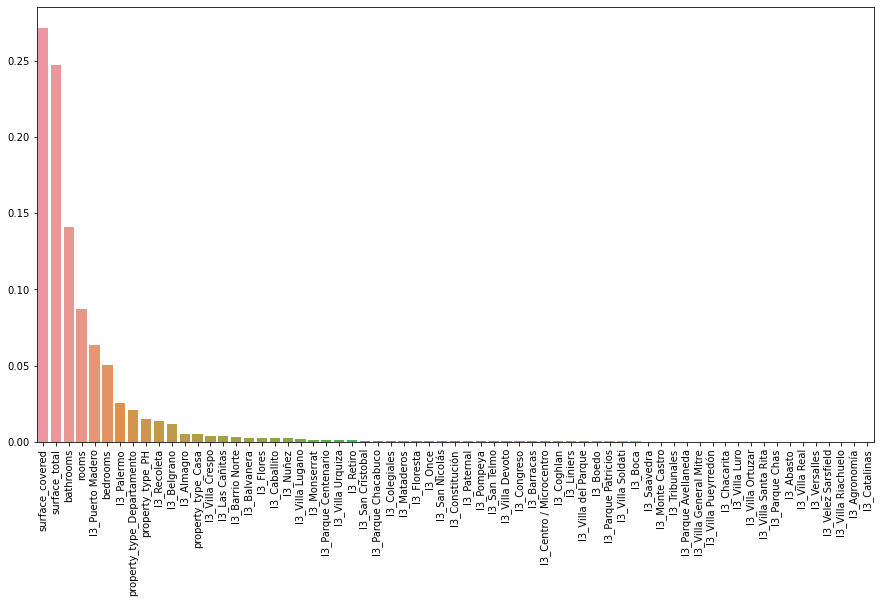

In [49]:
importances = clf_optimo.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8))
sns.barplot(columns[indices], importances[indices])
plt.xticks(rotation=90)
plt.show()

Apartir de este grafico podemos observar que para el Random Forest los 4 atributos mas importantes fueron surface covered, surface total, baños y cuartos. Creo yo que esto es bueno ya que en el mundo real las propiedades se suelen tazar apartir de estas caracteristicas lo que significa que el modelo esta eligiendo bien en que enfocarse.Dentro de los atributos menos importantes podemos encontrar en su mayoria, por no decir en su totalidad, muchos features relacionados a la ubicacion de la propiedad, esto no esta bueno ya que la ubicacion es importante aunque en los barrios donde puede verse mas afectado el precio por la zona podemos ver que la importancia de la feature que la representa es mayor

Ahora voy a proceder a elegir algunos arboles y ver que features les importa a ellos.

In [50]:
clf_optimo.estimators_

[DecisionTreeRegressor(max_depth=20, max_features='sqrt',
                       random_state=1608637542),
 DecisionTreeRegressor(max_depth=20, max_features='sqrt',
                       random_state=1273642419),
 DecisionTreeRegressor(max_depth=20, max_features='sqrt',
                       random_state=1935803228),
 DecisionTreeRegressor(max_depth=20, max_features='sqrt', random_state=787846414),
 DecisionTreeRegressor(max_depth=20, max_features='sqrt', random_state=996406378),
 DecisionTreeRegressor(max_depth=20, max_features='sqrt',
                       random_state=1201263687),
 DecisionTreeRegressor(max_depth=20, max_features='sqrt', random_state=423734972),
 DecisionTreeRegressor(max_depth=20, max_features='sqrt', random_state=415968276),
 DecisionTreeRegressor(max_depth=20, max_features='sqrt', random_state=670094950),
 DecisionTreeRegressor(max_depth=20, max_features='sqrt',
                       random_state=1914837113),
 DecisionTreeRegressor(max_depth=20, max_features=

In [51]:
clf_tree = clf_optimo.estimators_[20]
clf_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 88409749,
 'splitter': 'best'}

C:\Users\freib\OneDrive\Documentos\CURSO DATA SCIENCE 2021\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


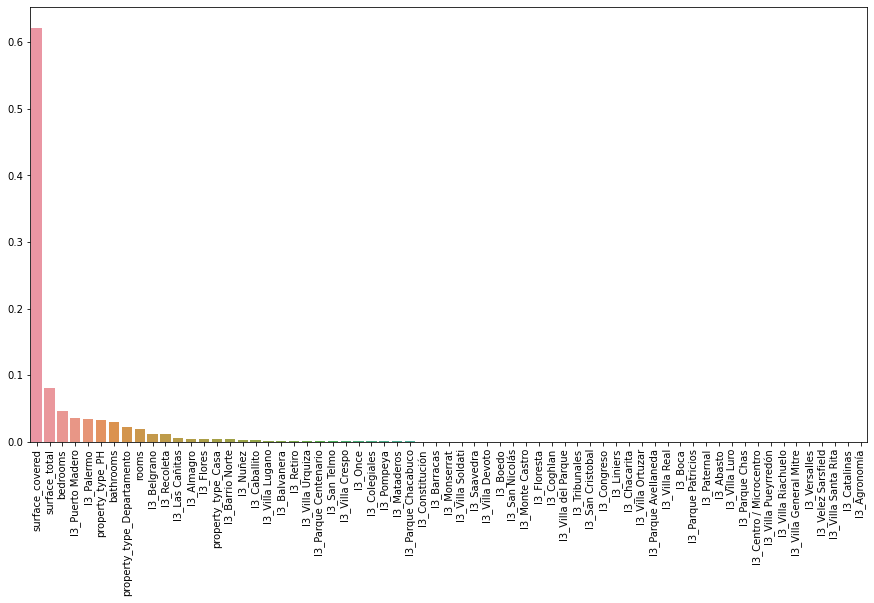

In [52]:
importances = clf_tree.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8))
sns.barplot(columns[indices], importances[indices])
plt.xticks(rotation=90)
plt.show()

En este arbol podemos observar que la importancia de los features es muy similar a la que hay en el random forest, las de mas importancia son las mismas aunque podemos ver una minima variacion

In [53]:
clf_tree2 = clf_optimo.estimators_[13]
clf_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 88409749,
 'splitter': 'best'}

C:\Users\freib\OneDrive\Documentos\CURSO DATA SCIENCE 2021\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


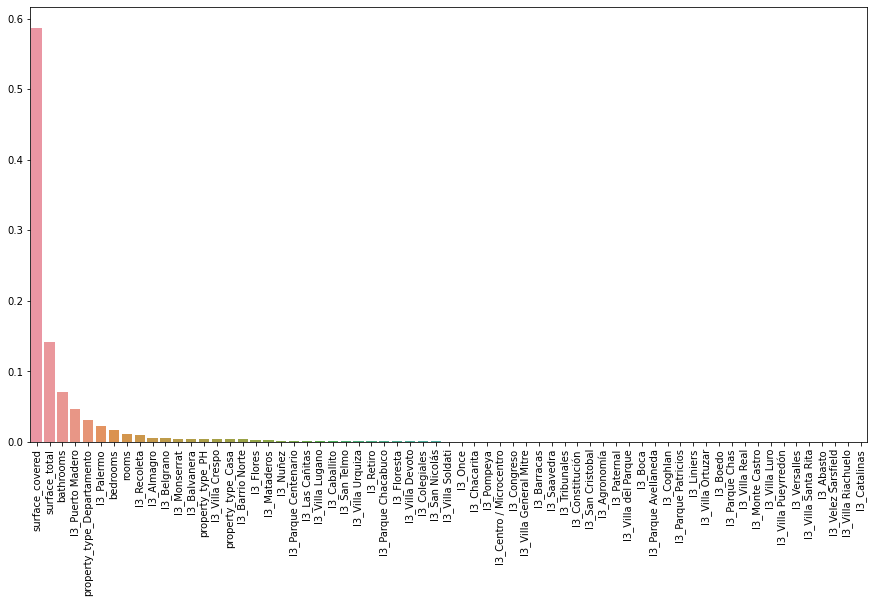

In [54]:
importances = clf_tree2.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8))
sns.barplot(columns[indices], importances[indices])
plt.xticks(rotation=90)
plt.show()

In [55]:
clf_tree3 = clf_optimo.estimators_[52]
clf_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 88409749,
 'splitter': 'best'}

C:\Users\freib\OneDrive\Documentos\CURSO DATA SCIENCE 2021\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


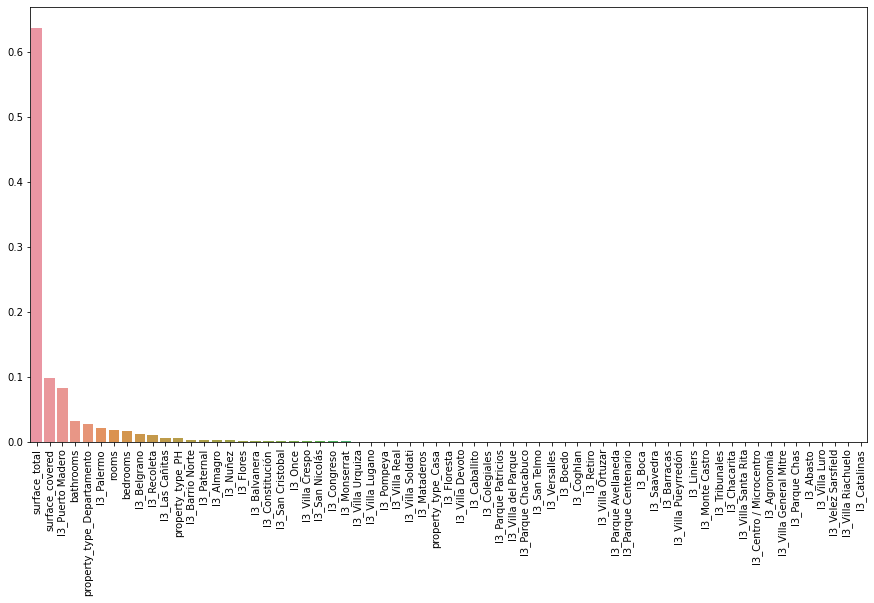

In [56]:
importances = clf_tree3.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8))
sns.barplot(columns[indices], importances[indices])
plt.xticks(rotation=90)
plt.show()

En este podemos observar ya si una diferencia con los anteriores, debido a que podemos ver que en este arbol toma mayor preponderancia la ubicacion de la propiedad. Lo bueno es que las primeras dos features on mas importancia siguen siendo las mismas que en los anteriores

In [57]:
clf_tree4 = clf_optimo.estimators_[97]
clf_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 88409749,
 'splitter': 'best'}

C:\Users\freib\OneDrive\Documentos\CURSO DATA SCIENCE 2021\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


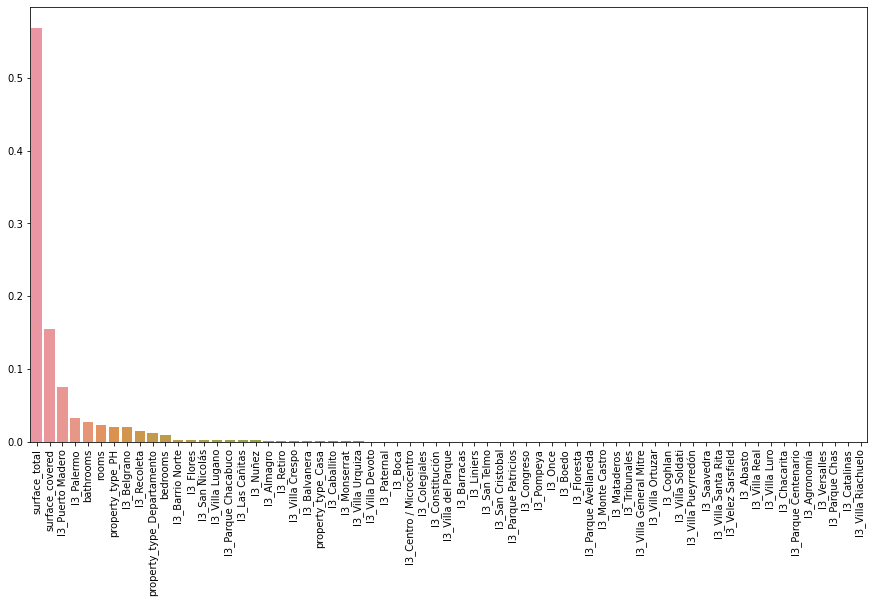

In [58]:
importances = clf_tree4.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8))
sns.barplot(columns[indices], importances[indices])
plt.xticks(rotation=90)
plt.show()

Luego de ver 4 arboles distintos de mi Random Forest, puedo afirmar que las dos features mas importntes son sin dudas surface total y surface covered. Luego en relacion al Random Forest como conjunto, podemos ver algunas variaciones en features de ubicaciones de las propiedades y de bedrooms, rooms y bathrooms que habian salido tambien como muy importantes, de todos modos siempre se mantuvieron entre las mas importantes asi que es normal. Esta diferencia creo que se puede estar dando ya que si hay una muestra que tine departamentos en zonas mas caras, a la hora de determinar el precio la zona va a ser mas importante que la cantidad de baños (por ejemplo) entonces esa feature pesa mas. En cambio, si utilizo una zona donde ese aspecto no va a afectar mucho mi precio, va a tener mas importancia la cantidad de baños. Por lo que se puede ver en el Random Forest, hay mas zonas que no aumetan mucho el precio de la propiedad que las que si lo hacen.

In [72]:
print(f'Pendientes: {clf_poly.coef_}')

Pendientes: [    0.         12537.34169894 10051.69278868 ...  7007.0294998
     0.         11163.94725372]


In [70]:
clf_poly.intercept_

-65600.33726253989

Para el modelo de regresion lineal se me dificulta visualizar todas las pendientes y saber qeu valor corresponde con cada variable, pero por lo que puedo obervar las variables suelen tener correlacion alta debido a su alto coeficiente que determina la pendiente. Tambien puedo ver que cuando todas las variables estan en un valor promedio, el modelo se equivoca en la prediccion por 65600 menos, que es similar a lo que me habia dado el conjunto de test de la regresion.

C:\Users\freib\OneDrive\Documentos\CURSO DATA SCIENCE 2021\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\freib\OneDrive\Documentos\CURSO DATA SCIENCE 2021\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


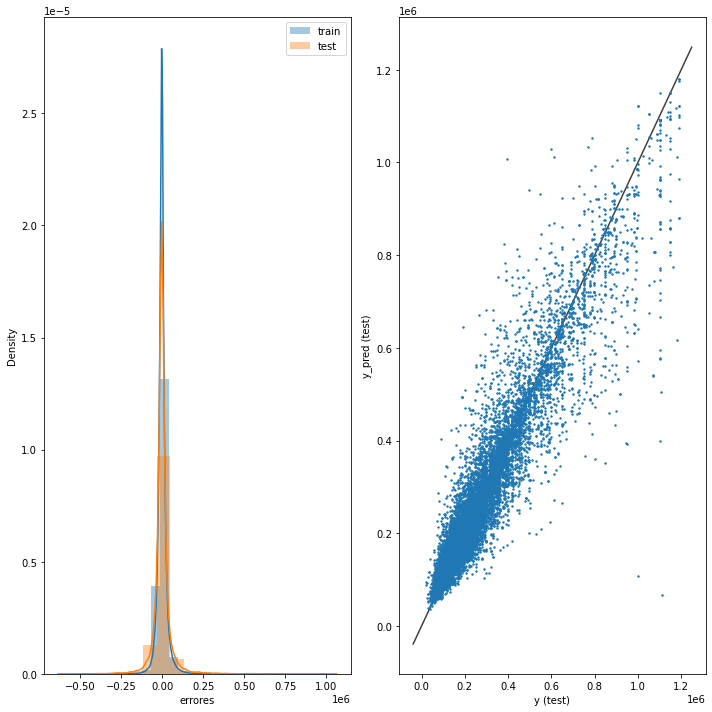

In [55]:

    
    plt.figure(figsize = (10,10))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

En este modelo de Random Forest podemos observar que en el grafico de la izquierda hay un diferencia de altura en la cima de la campana y que no hay tanta varianza en los errores ni para train ni para test aunque podemos obervar una mayor densidad en train que esta marcado con celeste. Por otro lado en el grafico de la derecha podemos observar que los valores que son mas chicos se ajustan muy bien a la recta y que a medida que las cifras van creciendo los datos se ajustan cada vez menos a la recta por lo que podemos entender que habria que mejorar la efectividad del modelo para cuando hay que predecir valores muy altos.

C:\Users\freib\OneDrive\Documentos\CURSO DATA SCIENCE 2021\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\freib\OneDrive\Documentos\CURSO DATA SCIENCE 2021\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


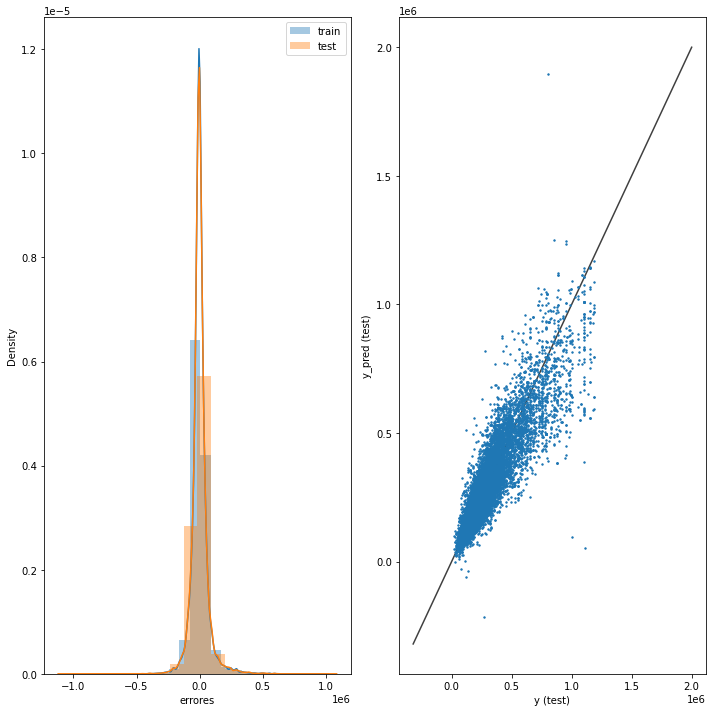

In [56]:
    plt.figure(figsize = (10,10))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred_clf_poly, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred_clf_poly, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred_clf_poly, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

En el grafico izquierdo de este modelo de Linear Regressor con regularizacion Ridge podemos observar algo parecido al modelo anteriormente expuesto aunque podemos diferenciarlo dicendo que no hay tanta diferencia entre train y test en la lo mas alto del grafico. En el grafico de la derecha pas algo similar al caso anterior pero podemos ver que este modelo no tiene tantos datos ni tan dispersos como el anterior, esto se debe a que en el calculo del error la diferencia que hay entre train y test es bastante menor. 

# CIERRE Y CONCLUSIONES

Las conclusiones que yo saco de este trabajo, sumandole la experiencia que pude adquirir en el primero son las siguientes: 1) Principalmente que un buen pre procesamiento de los datos puede ser realmente determinante a la hora de correr un modelo y que cuanto mejor hecho este mas exacto sera el modelo 2)Que a la hora de comparar entre modelos no hay que tener unicamente en cuenta cual es mejor sino tambien otras variables como quizas cual entiendo e interpreto mejor yo, cuanta diferencia hay entre el score en train y el score en test, que modelo es mas entendible y comodo para correrlo y algunas otras variables 3)Para poder hacer bien el trabajo de interpretar los modelos y los datos no hay que unicamente entender que esta haciendo el algoritmo o que funcion cumple el prorama sino que tambien hay que adentrarse en el tema que se esta tratando mediante una busqueda propia o conociemientos que ya tenia para poder interpretr y entender mejor el manejo de los datos y del modelo
Me senti comodo haciendo el trabajo, mejoraria quizas el hacerlo mas de corrido para poder seguirle el hilo a lo que voy haciendo y ser mas efectivo. Mejoraria tambien algunas cuestiones de redaccion y de explicacion de las cosas y tambien me gustaria poder hacer lo que corresponde a donde estan los errores de los modelos. En relacion al trabajo anterior siento que mejore la prolijidad en las cosas escritas que no son codigos y los titulos, lo cual es algo que me habia propuesto antes de empezar este Sprint Project

# ADICIONALES

# SVD

In [47]:
#Le aplico SVD al mismo dataset que le habia aplicado la otra reduccion de dimensionalidad
from sklearn.decomposition import TruncatedSVD

In [114]:
svd=TruncatedSVD(n_components=4,n_iter=5,random_state=42)
svd.fit(X)

TruncatedSVD(n_components=4, random_state=42)

In [115]:
X_red = svd.transform(X)

In [116]:
print(svd.explained_variance_ratio_.sum())
print(svd.explained_variance_ratio_)


0.9997879226688442
[9.59845815e-01 3.96078062e-02 2.74267951e-04 6.00338298e-05]


In [117]:
#Hago el abol de nuevo pero esta vez con los datos con la reduccion de dimensionalidad SVD hecha
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y, test_size=0.33, random_state=42)

In [118]:
#Utilizo los mismos parametros que utlice en el arbol anterior de PCA
regresor3 = DecisionTreeRegressor(max_depth=5, random_state = 42)
regresor3.fit(X_train_red,y_train_red)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [119]:
y_train_pred_nuevo_red = regresor3.predict(X_train_red)
y_test_pred_nuevo_red = regresor3.predict(X_test_red)

In [120]:
#Veo los resultados tanto para train como para test de este otro arbol
print(np.sqrt(mean_squared_error(y_train_red,y_train_pred_nuevo_red)))
print(np.sqrt(mean_squared_error(y_test_red,y_test_pred_nuevo_red)))

90397.41121491039
92461.11154163066


Apartir de este arbol puedo ver que el arbol que ejecuta los datos reducidos por SVD tienen mejores resultados qeu los reducidos por PCA, aunque por muy poca diferencia. Tambien puedo observar que cuantos mas features tiene la reduccion mejor es mi resultado.

Text(0, 0.5, 'y')

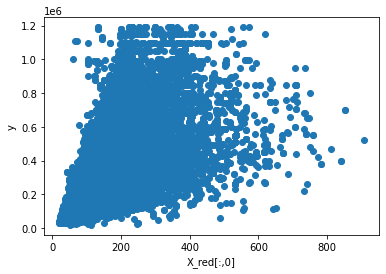

In [122]:
plt.scatter(X_red[:,0], y)
plt.xlabel('X_red[:,0]')
plt.ylabel('y')

Text(0, 0.5, 'y')

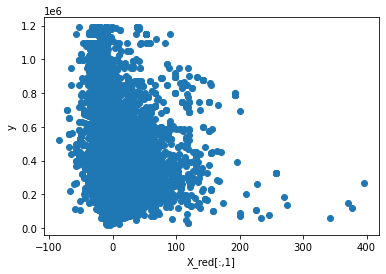

In [123]:
plt.scatter(X_red[:,1], y)
plt.xlabel('X_red[:,1]')
plt.ylabel('y')

Text(0, 0.5, 'y')

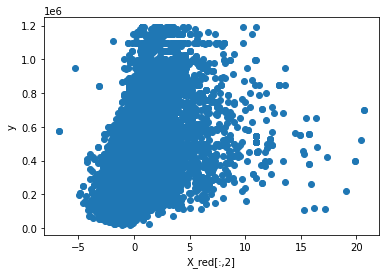

In [124]:
plt.scatter(X_red[:,2], y)
plt.xlabel('X_red[:,2]')
plt.ylabel('y')

Text(0, 0.5, 'y')

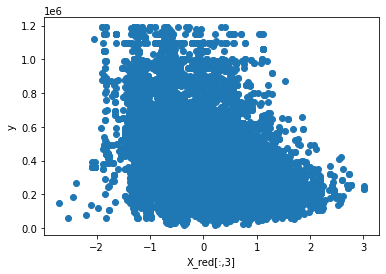

In [125]:
plt.scatter(X_red[:,3], y)
plt.xlabel('X_red[:,3]')
plt.ylabel('y')

Con estos graficos pude visualizar la relacion entre los features que se generaron apartir de la reduccion con SVD, aunque son unos poco complicadas de interpretar ya que no se a que corresponden los valores especificamente ya que son producto de la reduccion ya mencionada.

# CLUSTERING

In [83]:
#Hago una nueva reeduccion ademas de la otra con SVD para una mejor visualizacion de mis clusters
svd2=TruncatedSVD(n_components=1,n_iter=5,random_state=42)
svd2.fit(X)

TruncatedSVD(n_components=1, random_state=42)

In [84]:
X_red2 = svd2.transform(X)

C:\Users\freib\OneDrive\Documentos\CURSO DATA SCIENCE 2021\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\freib\OneDrive\Documentos\CURSO DATA SCIENCE 2021\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


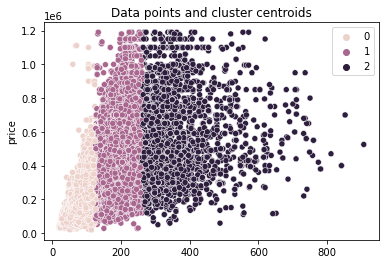

In [136]:
from sklearn.cluster import KMeans
kmeans_iris = KMeans(n_clusters=3, random_state=0)
kmeans_iris = kmeans_iris.fit(X_red2)
etiquetas_iris = kmeans_iris.labels_ # miramos las etiquetas que les puso
centros_iris = kmeans_iris.cluster_centers_ # centroides

sns.scatterplot(X_red[:,0],y, hue = etiquetas_iris)
sns.scatterplot(centros_iris[:, 0],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

C:\Users\freib\OneDrive\Documentos\CURSO DATA SCIENCE 2021\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\freib\OneDrive\Documentos\CURSO DATA SCIENCE 2021\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


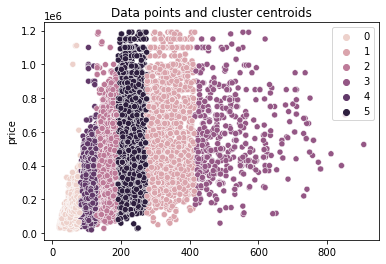

In [135]:
from sklearn.cluster import KMeans
kmeans_iris = KMeans(n_clusters=6, random_state=0)
kmeans_iris = kmeans_iris.fit(X_red2)
etiquetas_iris = kmeans_iris.labels_ # miramos las etiquetas que les puso
centros_iris = kmeans_iris.cluster_centers_ # centroides

sns.scatterplot(X_red[:,0],y, hue = etiquetas_iris)
sns.scatterplot(centros_iris[:, 0],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

In [87]:
X_red2

array([[ 90.94951578],
       [ 63.41016192],
       [ 97.37126226],
       ...,
       [196.4239663 ],
       [335.2673172 ],
       [204.21890013]])

Visualizando la division de clusters y teniendo en cuenta los valores que toman los ejes en el grafico, una manera de pensarlo puede ser que los clusters se dividen por el tamaño denla propiedad y que el eje X el valor mas preponderante es esa feature del dataset anterior ya que en todos los modelos anteriores tambien fue la mas importante. Tambien puedo pensar esto porque si yo lo grafico con mas clusters, estos se siguen dividiendo de manera vertical dando a pensar que la divsision se determina por el eje X. En caso de que la division sea por ubicacio geografica, la diferencia de precio acompañaria a esto y los clusters se dividiarian en horizontal por ejemplo. 

Tambien acompaña a esto que hay pocos datos que sobrepasen el valor de 750 que es el limite que yo puse en mi dataset X como limite. Los que lo sobrepasan puede ser por la modificacion de la reduccion de dimensionalidad, pero son muy pocos.